# Estimation of Discrete Choice Model under Limited Observables
In this study, we estimate a limited observables discrete choice model in the format of a price model.

## Table of Contents:

- [Data Generation](#Data-Generation)
    - [Conditional Multinomial Logit Model](#Conditional-Multinomial-Logit-Model)
    - [Data Specifications](#Data-Specifications)
- [Treatment Conditions](#Treatment-Conditions)
- [Summary Statistics](#Summary-statistics)
    - [Trial 1: T = 1000](#Trial-1:-T-=-1000)
        - [Base Case](#Trial-1:-Base-Case)
        - [High $v$ Variance Case](#Trial-1:-High-$v$-Variance-Case)
        - [High $\omega$ Case](#Trial-1:-High-$\omega$-Case)
        - [High $v$ Variance and $\omega$ Case](#Trial-1:-High-$v$-Variance-and-$\omega$-Case)
    - [Trial 2: T = 10000](#Trial-2:-T-=-10000)
        - [Base Case](#Trial-2:-Base-Case)
        - [High $v$ Variance Case](#Trial-2:-High-$v$-Variance-Case)
        - [High $\omega$ Case](#Trial-2:-High-$\omega$-Case)
        - [High $v$ Variance and $\omega$ Case](#Trial-2:-High-$v$-Variance-and-$\omega$-Case)
- [Distribution](#Distribution)
    - [Trial 1: T = 1000](#Trial-1:-T-=-1000-case)
        - [Base Case](#T1:-Base-Case)
        - [High $v$ Variance Case](#Trial-1:-High-$\sigma^2_v$-Case)
        - [High $\omega$ Case](#T1:-High-$\omega$-Case)
        - [High $v$ Variance and $\omega$ Case](#Trial-1:-High-$\sigma^2_v$-and-$\omega$-Case)
    - [Trial 2: T = 10000](#Trial-2:-T-=-10000-case)
        - [Base Case](#T2:-Base-Case)
        - [High $v$ Variance Case](#Trial-2:-High-$\sigma^2_v$-Case)
        - [High $\omega$ Case](#T2:-High-$\omega$-Case)
        - [High $v$ Variance and $\omega$ Case](#Trial-2:-High-$\sigma^2_v$-and-$\omega$-Case)

---
## Data Generation

### Conditional Multinomial Logit Model
We employ a standard conditional multinomial logit model, with two coefficients representing individual and product characteristics and an intercept.

We set the true coefficients are as follows: $\alpha$ - intercept, $\gamma$ - price, $\beta$ - individual.
$$\alpha = 1,\quad\gamma = 0.5\quad\beta = 0.25$$

For each treatment condition, we take our model with $N=10000$ individuals and $J$ = 5 products (products are indexed from 0, hence $j=0,...,4$)

Data is generated with parameters $\sigma^2_v$ and $\omega$.
$$\begin{split}
X_{i,j} &= j + v\quad(v\sim N(0,\sigma^2_v))\\
P_{i,j} &= X_{i,j} + w\quad(w\sim Uni(-\omega,\omega))
\end{split}$$

Thus, we calculate the optimal choice for each indivdual with the following utility where $Y_{ij}=1$ if and only if $j=\arg\max_{k}U_{ik}$. 
$$U_{ij}=\alpha-\gamma P_{ij}+\beta X_{ij}+\varepsilon_{ij}$$

The ```create_data``` function in the ```functions``` module represents this process.

### Data Specifications
We generate a total of 8 datasets, 4 with T = 1000 and 4 with T = 10000 trials. For both sets of trials, we have four cases.
- Base case: we have the variance of the $v$ term as the usual $\sigma^2_v=1$ and the range of the uniform distribution for $\omega$ as $2$.
- High $v$ variance case: we set $\sigma^2_v=4$ and $\omega$'s specification is the same.
- High $\omega$ case: we set the range to $8$ and keep $\sigma^2_v=1$.
- High $v$ variance and $\omega$: we set $\sigma^2_v=4$ and $\omega$ to $8$.

## Treatment Conditions

The purpose of the study is to see if the generated data accurately represents the model given limitations on the observable features. Hence, we aim to estimate the coefficients given the generated data. Thus, we impose three different limitations on the observable features, with one control. (We list the corresponding function in the ```functions``` module that transforms the dataset for each treatment version below.)
1. Data is the true data (control).
2. Data now omits the real price from non-chosen products for each individuals. Then uses the average price within chosen product `j`s to replace price for ALL choices, including observed ones.
    - ```fill_all_price_with_average```
3. Data now omits the real price from non-chosen products for each individuals. Then uses the average price within chosen product `j`s to replace price for nonchosen products, and thus observed price is still used for chosen products.
    - ```fill_nonobserved_with_average```
4. Data replaces price for ALL choices with the sum of the predicted price of version 2 and the difference between individual characteristics and product index, i.e. $\hat{P}=\hat{P}_2+X_{ij}-j$.
    - ```fill_all_price_with_difference```

---
Import necessary packages and set file paths

Majority of the simulation functions are dependendent on the [`pylogit`](https://pypi.org/project/pylogit) module. Please make sure to have the corresponding module installed before any run of this notebook or code in the subfolders.

In [1]:
import pandas as pd

# quick storage method for python objects to local directory
import pickle

# import plotting functions
from functions import plot_coefs_all

%matplotlib inline

file_path = "../output/"

Read in coefficient data

In [2]:
# read coefficients

# T = 1000 base case
with open(file_path + "coefs/t1_base_coefs.pkl", "rb") as f:
    t1_base_coefs_1 = pickle.load(f)
    t1_base_coefs_2 = pickle.load(f)
    t1_base_coefs_3 = pickle.load(f)
    t1_base_coefs_4 = pickle.load(f)
    
# T = 1000 high v variance case
with open(file_path + "coefs/t1_high_v_var_coefs.pkl", "rb") as f:
    t1_high_v_var_coefs_1 = pickle.load(f)
    t1_high_v_var_coefs_2 = pickle.load(f)
    t1_high_v_var_coefs_3 = pickle.load(f)
    t1_high_v_var_coefs_4 = pickle.load(f)
    
# T = 1000 high w range case
with open(file_path + "coefs/t1_high_w_range_coefs.pkl", "rb") as f:
    t1_high_w_range_coefs_1 = pickle.load(f)
    t1_high_w_range_coefs_2 = pickle.load(f)
    t1_high_w_range_coefs_3 = pickle.load(f)
    t1_high_w_range_coefs_4 = pickle.load(f)

# T = 1000 high v variance and w range case
with open(file_path + "coefs/t1_high_v_and_w_coefs.pkl", "rb") as f:
    t1_high_v_and_w_coefs_1 = pickle.load(f)
    t1_high_v_and_w_coefs_2 = pickle.load(f)
    t1_high_v_and_w_coefs_3 = pickle.load(f)
    t1_high_v_and_w_coefs_4 = pickle.load(f)
    
# T = 10000 base case
with open(file_path + "coefs/t2_base_coefs.pkl", "rb") as f:
    t2_base_coefs_1 = pickle.load(f)
    t2_base_coefs_2 = pickle.load(f)
    t2_base_coefs_3 = pickle.load(f)
    t2_base_coefs_4 = pickle.load(f)
    
# T = 10000 high v variance case
with open(file_path + "coefs/t2_high_v_var_coefs.pkl", "rb") as f:
    t2_high_v_var_coefs_1 = pickle.load(f)
    t2_high_v_var_coefs_2 = pickle.load(f)
    t2_high_v_var_coefs_3 = pickle.load(f)
    t2_high_v_var_coefs_4 = pickle.load(f)
    
# T = 10000 high w range case
with open(file_path + "coefs/t2_high_w_range_coefs.pkl", "rb") as f:
    t2_high_w_range_coefs_1 = pickle.load(f)
    t2_high_w_range_coefs_2 = pickle.load(f)
    t2_high_w_range_coefs_3 = pickle.load(f)
    t2_high_w_range_coefs_4 = pickle.load(f)

# T = 10000 high v variance and w range case
with open(file_path + "coefs/t2_high_v_and_w_coefs.pkl", "rb") as f:
    t2_high_v_and_w_coefs_1 = pickle.load(f)
    t2_high_v_and_w_coefs_2 = pickle.load(f)
    t2_high_v_and_w_coefs_3 = pickle.load(f)
    t2_high_v_and_w_coefs_4 = pickle.load(f)

## Summary statistics

Note true coefficients are as follows: $\alpha$ - intercept, $\gamma$ - price, $\beta$ - individual
$$\alpha = 1,\quad\gamma = 0.5\quad\beta = 0.25$$

### Trial 1: T = 1000

#### Trial 1: Base Case

In [3]:
df = pd.concat([t1_base_coefs_1.describe(), t1_base_coefs_2.describe(), t1_base_coefs_3.describe(), t1_base_coefs_4.describe()], axis=1)
df.columns = pd.MultiIndex.from_product([['Version 1', 'Version 2', 'Version 3', 'Version 4'],['alpha', 'gamma', 'beta']])
df

Version 1                              Version 2               \
             alpha        gamma         beta        alpha        gamma   
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.013300     0.561330     0.279962     0.028462     0.009808   
std       0.028868     0.011171     0.013329     0.032360     0.017036   
min      -0.076258     0.520596     0.236267    -0.068681    -0.047651   
25%      -0.006276     0.553548     0.270989     0.006141    -0.001469   
50%       0.014000     0.561429     0.279620     0.027972     0.010240   
75%       0.032442     0.569114     0.289160     0.049235     0.021105   
max       0.104443     0.597222     0.320346     0.141145     0.061580   

                      Version 3                              Version 4  \
              beta        alpha        gamma         beta        alpha   
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     -0.255555    -0.038068    -0.073096    -0.303569     0.027842   
std       0.011274     0.027859     0.011491     0.011491     0.033341   
min      -0.291430    -0.122536    -0.113875    -0.339431    -0.089238   
25%      -0.263502    -0.057130    -0.080774    -0.311310     0.004442   
50%      -0.255180    -0.038231    -0.072907    -0.303369     0.027602   
75%      -0.247693    -0.019486    -0.065220    -0.295547     0.049612   
max      -0.220748     0.047718    -0.037045    -0.269500     0.172250   

                                 
             gamma         beta  
count  1000.000000  1000.000000  
mean     -0.115804    -0.371921  
std       0.215268     0.208052  
min      -1.052591    -1.282735  
25%      -0.247692    -0.502490  
50%      -0.114631    -0.372428  
75%       0.027243    -0.235687  
max       0.506278     0.224309

#### Trial 1: High $v$ Variance Case

In [4]:
df = pd.concat([t1_high_v_var_coefs_1.describe(), t1_high_v_var_coefs_2.describe(), t1_high_v_var_coefs_3.describe(), t1_high_v_var_coefs_4.describe()], axis=1)
df.columns = pd.MultiIndex.from_product([['Version 1', 'Version 2', 'Version 3', 'Version 4'],['alpha', 'gamma', 'beta']])
df

Version 1                              Version 2               \
             alpha        gamma         beta        alpha        gamma   
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.003288     0.553174     0.276633     0.011356     0.004542   
std       0.026061     0.012084     0.011810     0.035335     0.015648   
min      -0.079822     0.517175     0.238138    -0.106429    -0.047569   
25%      -0.013058     0.545042     0.268678    -0.013348    -0.006138   
50%       0.003109     0.553356     0.277169     0.012021     0.004858   
75%       0.019891     0.561754     0.284645     0.036361     0.015500   
max       0.091434     0.596400     0.315587     0.133931     0.057501   

                      Version 3                              Version 4  \
              beta        alpha        gamma         beta        alpha   
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     -0.253136    -0.298754    -0.276753    -0.349026     0.012689   
std       0.003662     0.030355     0.006983     0.006025     0.036314   
min      -0.266557    -0.396046    -0.298311    -0.369112    -0.101792   
25%      -0.255552    -0.319400    -0.281754    -0.353069    -0.012077   
50%      -0.253243    -0.297710    -0.276586    -0.349112     0.013956   
75%      -0.250583    -0.279188    -0.272146    -0.344901     0.037115   
max      -0.239500    -0.188499    -0.255408    -0.327618     0.130525   

                                 
             gamma         beta  
count  1000.000000  1000.000000  
mean     -0.014576    -0.267664  
std       0.044599     0.043939  
min      -0.192345    -0.441745  
25%      -0.043750    -0.296179  
50%      -0.016282    -0.269363  
75%       0.014971    -0.240088  
max       0.179188    -0.077445

#### Trial 1: High $\omega$ Case

In [5]:
df = pd.concat([t1_high_w_range_coefs_1.describe(), t1_high_w_range_coefs_2.describe(), t1_high_w_range_coefs_3.describe(),t1_high_w_range_coefs_4.describe()], axis=1)
df.columns = pd.MultiIndex.from_product([['Version 1', 'Version 2', 'Version 3', 'Version 4'],['alpha', 'gamma', 'beta']])
df

Version 1                              Version 2               \
             alpha        gamma         beta        alpha        gamma   
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.000577     0.542696     0.276518     0.013351     0.004563   
std       0.041900     0.006590     0.011534     0.032964     0.018057   
min      -0.124395     0.519544     0.235896    -0.084877    -0.058708   
25%      -0.027027     0.537934     0.268984    -0.008504    -0.006897   
50%      -0.000046     0.542500     0.276791     0.013164     0.004388   
75%       0.029262     0.547227     0.283921     0.035570     0.016805   
max       0.127648     0.565110     0.309507     0.138267     0.059716   

                      Version 3                              Version 4  \
              beta        alpha        gamma         beta        alpha   
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     -0.138704     0.001091    -0.011574    -0.146916     0.012910   
std       0.011318     0.028562     0.003595     0.008219     0.035215   
min      -0.185640    -0.076013    -0.023064    -0.180811    -0.119783   
25%      -0.146776    -0.018252    -0.013998    -0.152363    -0.008297   
50%      -0.138574     0.000447    -0.011607    -0.146946     0.013936   
75%      -0.131150     0.019375    -0.009099    -0.141337     0.035037   
max      -0.107339     0.093379    -0.001404    -0.120960     0.147316   

                                 
             gamma         beta  
count  1000.000000  1000.000000  
mean     -0.019249    -0.158338  
std       0.093541     0.086020  
min      -0.428180    -0.539010  
25%      -0.083527    -0.218893  
50%      -0.019863    -0.157400  
75%       0.040119    -0.104886  
max       0.373712     0.219508

#### Trial 1: High $v$ Variance and $\omega$ Case

In [6]:
df = pd.concat([t1_high_v_and_w_coefs_1.describe(), t1_high_v_and_w_coefs_2.describe(), t1_high_v_and_w_coefs_3.describe(), t1_high_v_and_w_coefs_4.describe()], axis=1)
df.columns = pd.MultiIndex.from_product([['Version 1', 'Version 2', 'Version 3', 'Version 4'],['alpha', 'gamma', 'beta']])
df

Version 1                              Version 2               \
             alpha        gamma         beta        alpha        gamma   
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.001785     0.540632     0.272837     0.011290     0.003476   
std       0.035673     0.006665     0.006017     0.035852     0.014886   
min      -0.120351     0.517335     0.250861    -0.109411    -0.042675   
25%      -0.022164     0.536171     0.268835    -0.013797    -0.006988   
50%       0.001260     0.540576     0.272734     0.011195     0.002526   
75%       0.026862     0.545243     0.276913     0.035675     0.013119   
max       0.112469     0.561456     0.291531     0.115464     0.056587   

                      Version 3                              Version 4  \
              beta        alpha        gamma         beta        alpha   
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     -0.136925    -0.101401    -0.084494    -0.157363     0.011412   
std       0.002972     0.026034     0.003019     0.003464     0.037428   
min      -0.146267    -0.189685    -0.094500    -0.168115    -0.117223   
25%      -0.138894    -0.117334    -0.086509    -0.159819    -0.013731   
50%      -0.136900    -0.101458    -0.084541    -0.157377     0.012108   
75%      -0.134899    -0.083432    -0.082490    -0.155049     0.035843   
max      -0.128427    -0.013632    -0.074383    -0.147863     0.148171   

                                 
             gamma         beta  
count  1000.000000  1000.000000  
mean     -0.011165    -0.148065  
std       0.046773     0.046233  
min      -0.206531    -0.342980  
25%      -0.041426    -0.178054  
50%      -0.012296    -0.148865  
75%       0.018728    -0.118728  
max       0.148230     0.008074

---

### Trial 2: T = 10000

#### Trial 2: Base Case

In [7]:
df = pd.concat([t2_base_coefs_1.describe(), t2_base_coefs_2.describe(), t2_base_coefs_3.describe(), t2_base_coefs_4.describe()], axis=1)
df.columns = pd.MultiIndex.from_product([['Version 1', 'Version 2', 'Version 3', 'Version 4'],['alpha','gamma', 'beta']])
df

Version 1                                 Version 2                \
              alpha         gamma          beta         alpha         gamma   
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.015521      0.561189      0.279116      0.029821      0.009423   
std        0.029602      0.010958      0.013338      0.032711      0.017094   
min       -0.113617      0.520596      0.222465     -0.102005     -0.049902   
25%       -0.004736      0.553739      0.270253      0.007603     -0.002056   
50%        0.015596      0.561142      0.278978      0.029919      0.009377   
75%        0.035616      0.568547      0.288077      0.051648      0.021006   
max        0.132798      0.600366      0.326503      0.166142      0.067384   

                        Version 3                                 Version 4  \
               beta         alpha         gamma          beta         alpha   
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      -0.256322     -0.036698     -0.073529     -0.304386      0.029155   
std        0.011443      0.028669      0.011517      0.011661      0.034866   
min       -0.301685     -0.169096     -0.114190     -0.353458     -0.107671   
25%       -0.263969     -0.056062     -0.081389     -0.312141      0.005792   
50%       -0.256206     -0.036679     -0.073530     -0.304344      0.029173   
75%       -0.248744     -0.017234     -0.065672     -0.296633      0.051480   
max       -0.213631      0.087866     -0.032632     -0.260148      0.235230   

                                   
              gamma          beta  
count  10000.000000  10000.000000  
mean      -0.107671     -0.364594  
std        0.218374      0.211134  
min       -1.243248     -1.470591  
25%       -0.244169     -0.495315  
50%       -0.104643     -0.362238  
75%        0.031607     -0.230554  
max        0.878673      0.603818

#### Trial 2: High $v$ Variance Case

In [8]:
df = pd.concat([t2_high_v_var_coefs_1.describe(), t2_high_v_var_coefs_2.describe(), t2_high_v_var_coefs_3.describe(), t2_high_v_var_coefs_4.describe()], axis=1)
df.columns = pd.MultiIndex.from_product([['Version 1', 'Version 2', 'Version 3', 'Version 4'],['alpha', 'gamma', 'beta']])
df

Version 1                                 Version 2                \
              alpha         gamma          beta         alpha         gamma   
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.004219      0.553781      0.277342      0.011728      0.004144   
std        0.026699      0.012098      0.011884      0.036774      0.016768   
min       -0.082781      0.509720      0.232830     -0.133216     -0.051601   
25%       -0.013778      0.545645      0.269539     -0.013224     -0.007381   
50%        0.003953      0.553686      0.277281      0.011518      0.003789   
75%        0.022344      0.561911      0.285337      0.036081      0.015307   
max        0.112799      0.602579      0.323809      0.153426      0.080110   

                        Version 3                                 Version 4  \
               beta         alpha         gamma          beta         alpha   
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      -0.253060     -0.298710     -0.277029     -0.348967      0.012404   
std        0.003683      0.030012      0.006987      0.006084      0.036619   
min       -0.267940     -0.417435     -0.302825     -0.375926     -0.152344   
25%       -0.255529     -0.318745     -0.281726     -0.352990     -0.011856   
50%       -0.253051     -0.298728     -0.277005     -0.348917      0.013194   
75%       -0.250546     -0.278510     -0.272303     -0.344816      0.037106   
max       -0.238945     -0.176506     -0.251120     -0.324310      0.144372   

                                   
              gamma          beta  
count  10000.000000  10000.000000  
mean      -0.012619     -0.265629  
std        0.045437      0.044771  
min       -0.215712     -0.463652  
25%       -0.043156     -0.295511  
50%       -0.013355     -0.266561  
75%        0.016944     -0.236214  
max        0.184216     -0.072472

#### Trial 2: High $\omega$ Case

In [9]:
df = pd.concat([t2_high_w_range_coefs_1.describe(), t2_high_w_range_coefs_2.describe(), t2_high_w_range_coefs_3.describe(), t2_high_w_range_coefs_4.describe()], axis=1)
df.columns = pd.MultiIndex.from_product([['Version 1', 'Version 2', 'Version 3', 'Version 4'],['alpha', 'gamma', 'beta']])
df

Version 1                                 Version 2                \
              alpha         gamma          beta         alpha         gamma   
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.000753      0.542634      0.276002      0.014008      0.004481   
std        0.041993      0.006568      0.011619      0.033136      0.018216   
min       -0.149522      0.514082      0.224597     -0.104264     -0.058708   
25%       -0.027259      0.538232      0.268098     -0.008043     -0.007692   
50%        0.000910      0.542651      0.275957      0.013943      0.004406   
75%        0.029420      0.546963      0.283809      0.036026      0.016626   
max        0.158108      0.572318      0.321729      0.141546      0.073214   

                        Version 3                                 Version 4  \
               beta         alpha         gamma          beta         alpha   
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      -0.139181      0.001836     -0.011648     -0.147408      0.014197   
std        0.011202      0.028789      0.003626      0.008219      0.035671   
min       -0.185640     -0.100352     -0.025591     -0.180811     -0.131730   
25%       -0.146810     -0.017405     -0.014111     -0.152970     -0.008738   
50%       -0.139052      0.001798     -0.011653     -0.147370      0.014415   
75%       -0.131554      0.020902     -0.009215     -0.141788      0.036977   
max       -0.098480      0.098129      0.001989     -0.116961      0.239890   

                                   
              gamma          beta  
count  10000.000000  10000.000000  
mean      -0.020764     -0.160240  
std        0.094760      0.087550  
min       -0.622826     -0.747345  
25%       -0.082168     -0.216872  
50%       -0.019618     -0.158833  
75%        0.040274     -0.104184  
max        0.381700      0.219508

#### Trial 2: High $v$ Variance and $\omega$ Case

In [10]:
df = pd.concat([t2_high_v_and_w_coefs_1.describe(), t2_high_v_and_w_coefs_2.describe(), t2_high_v_and_w_coefs_3.describe(),t2_high_v_and_w_coefs_4.describe()], axis=1)
df.columns = pd.MultiIndex.from_product([['Version 1', 'Version 2', 'Version 3', 'Version 4'],['alpha', 'gamma', 'beta']])
df

Version 1                                 Version 2                \
              alpha         gamma          beta         alpha         gamma   
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.000626      0.540649      0.272993      0.009614      0.003127   
std        0.035530      0.006739      0.006178      0.034452      0.014729   
min       -0.147029      0.515964      0.249582     -0.110693     -0.055187   
25%       -0.023364      0.536050      0.268830     -0.013819     -0.006631   
50%        0.000620      0.540577      0.273029      0.009368      0.003059   
75%        0.024434      0.545184      0.277131      0.032455      0.012914   
max        0.136715      0.564400      0.296938      0.153096      0.068582   

                        Version 3                                 Version 4  \
               beta         alpha         gamma          beta         alpha   
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      -0.136877     -0.102483     -0.084652     -0.157371      0.010009   
std        0.003049      0.025443      0.003154      0.003556      0.035414   
min       -0.148859     -0.200652     -0.095916     -0.172268     -0.161769   
25%       -0.138903     -0.120179     -0.086777     -0.159739     -0.013496   
50%       -0.136839     -0.102529     -0.084669     -0.157312      0.010131   
75%       -0.134876     -0.085000     -0.082541     -0.155065      0.033468   
max       -0.125287     -0.006804     -0.072626     -0.143706      0.155305   

                                   
              gamma          beta  
count  10000.000000  10000.000000  
mean      -0.009900     -0.146766  
std        0.045101      0.044464  
min       -0.209352     -0.345814  
25%       -0.038252     -0.174871  
50%       -0.010383     -0.147148  
75%        0.019036     -0.118087  
max        0.254738      0.111907

## Distribution
Note true coefficients are as follows: $\alpha$ - intercept, $\gamma$ - price, $\beta$ - individual
$$\alpha = 1,\quad\gamma = 0.5\quad\beta = 0.25$$

### Trial 1: T = 1000 case

#### T1: Base Case

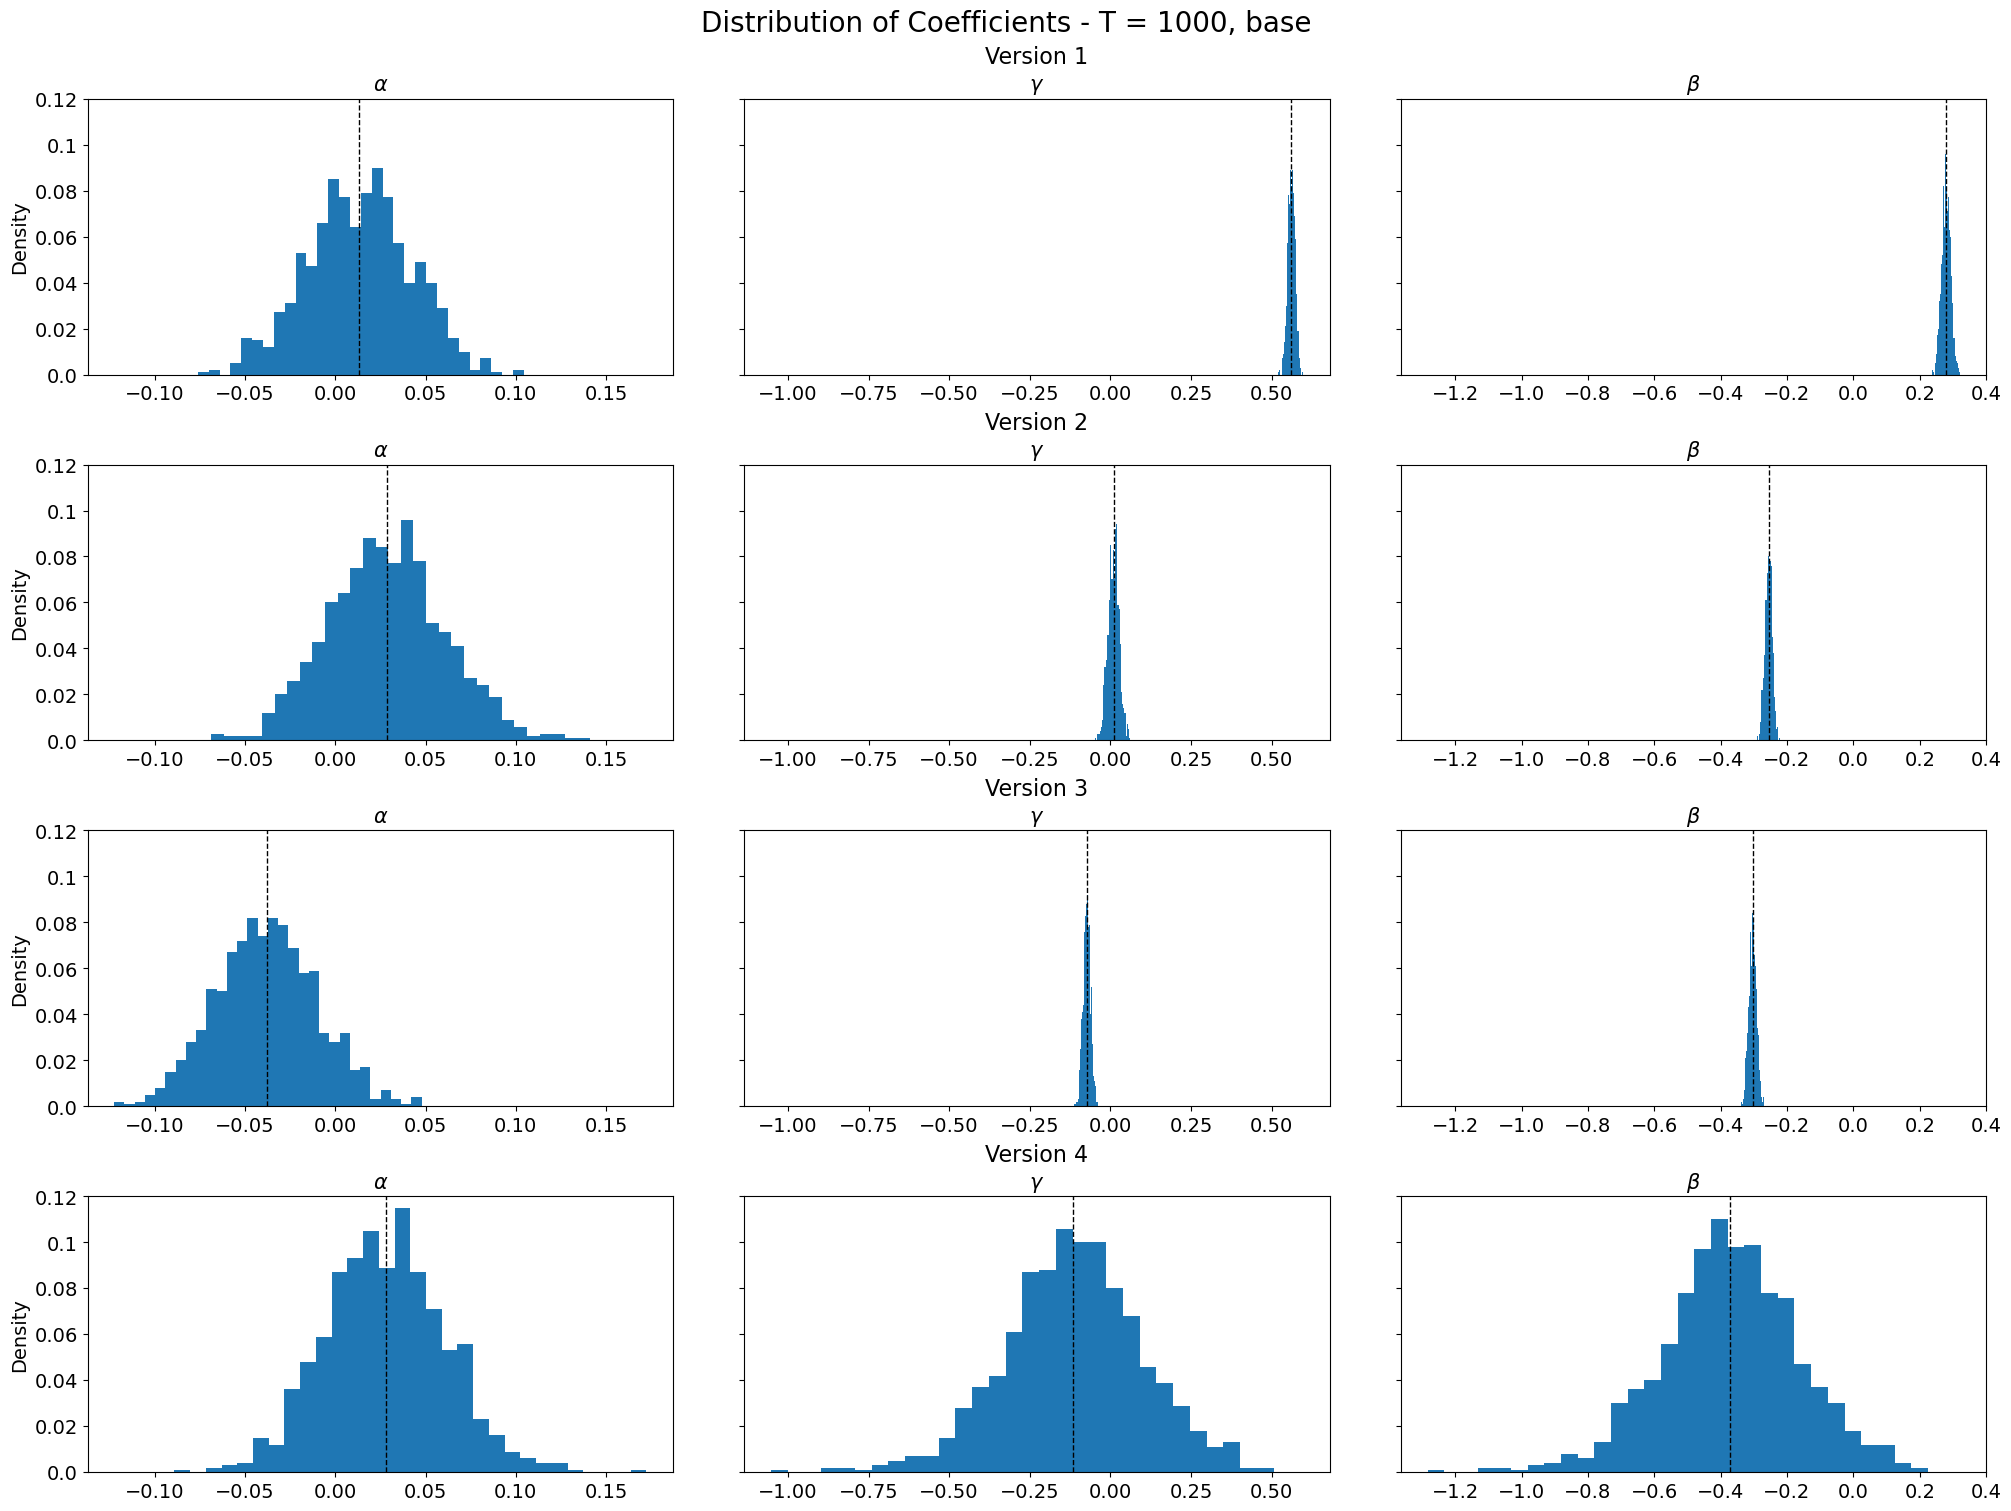

In [11]:
plot_coefs_all("T = 1000, base", [t1_base_coefs_1, t1_base_coefs_2, t1_base_coefs_3, t1_base_coefs_4])

#### Trial 1: High $\sigma^2_v$ Case

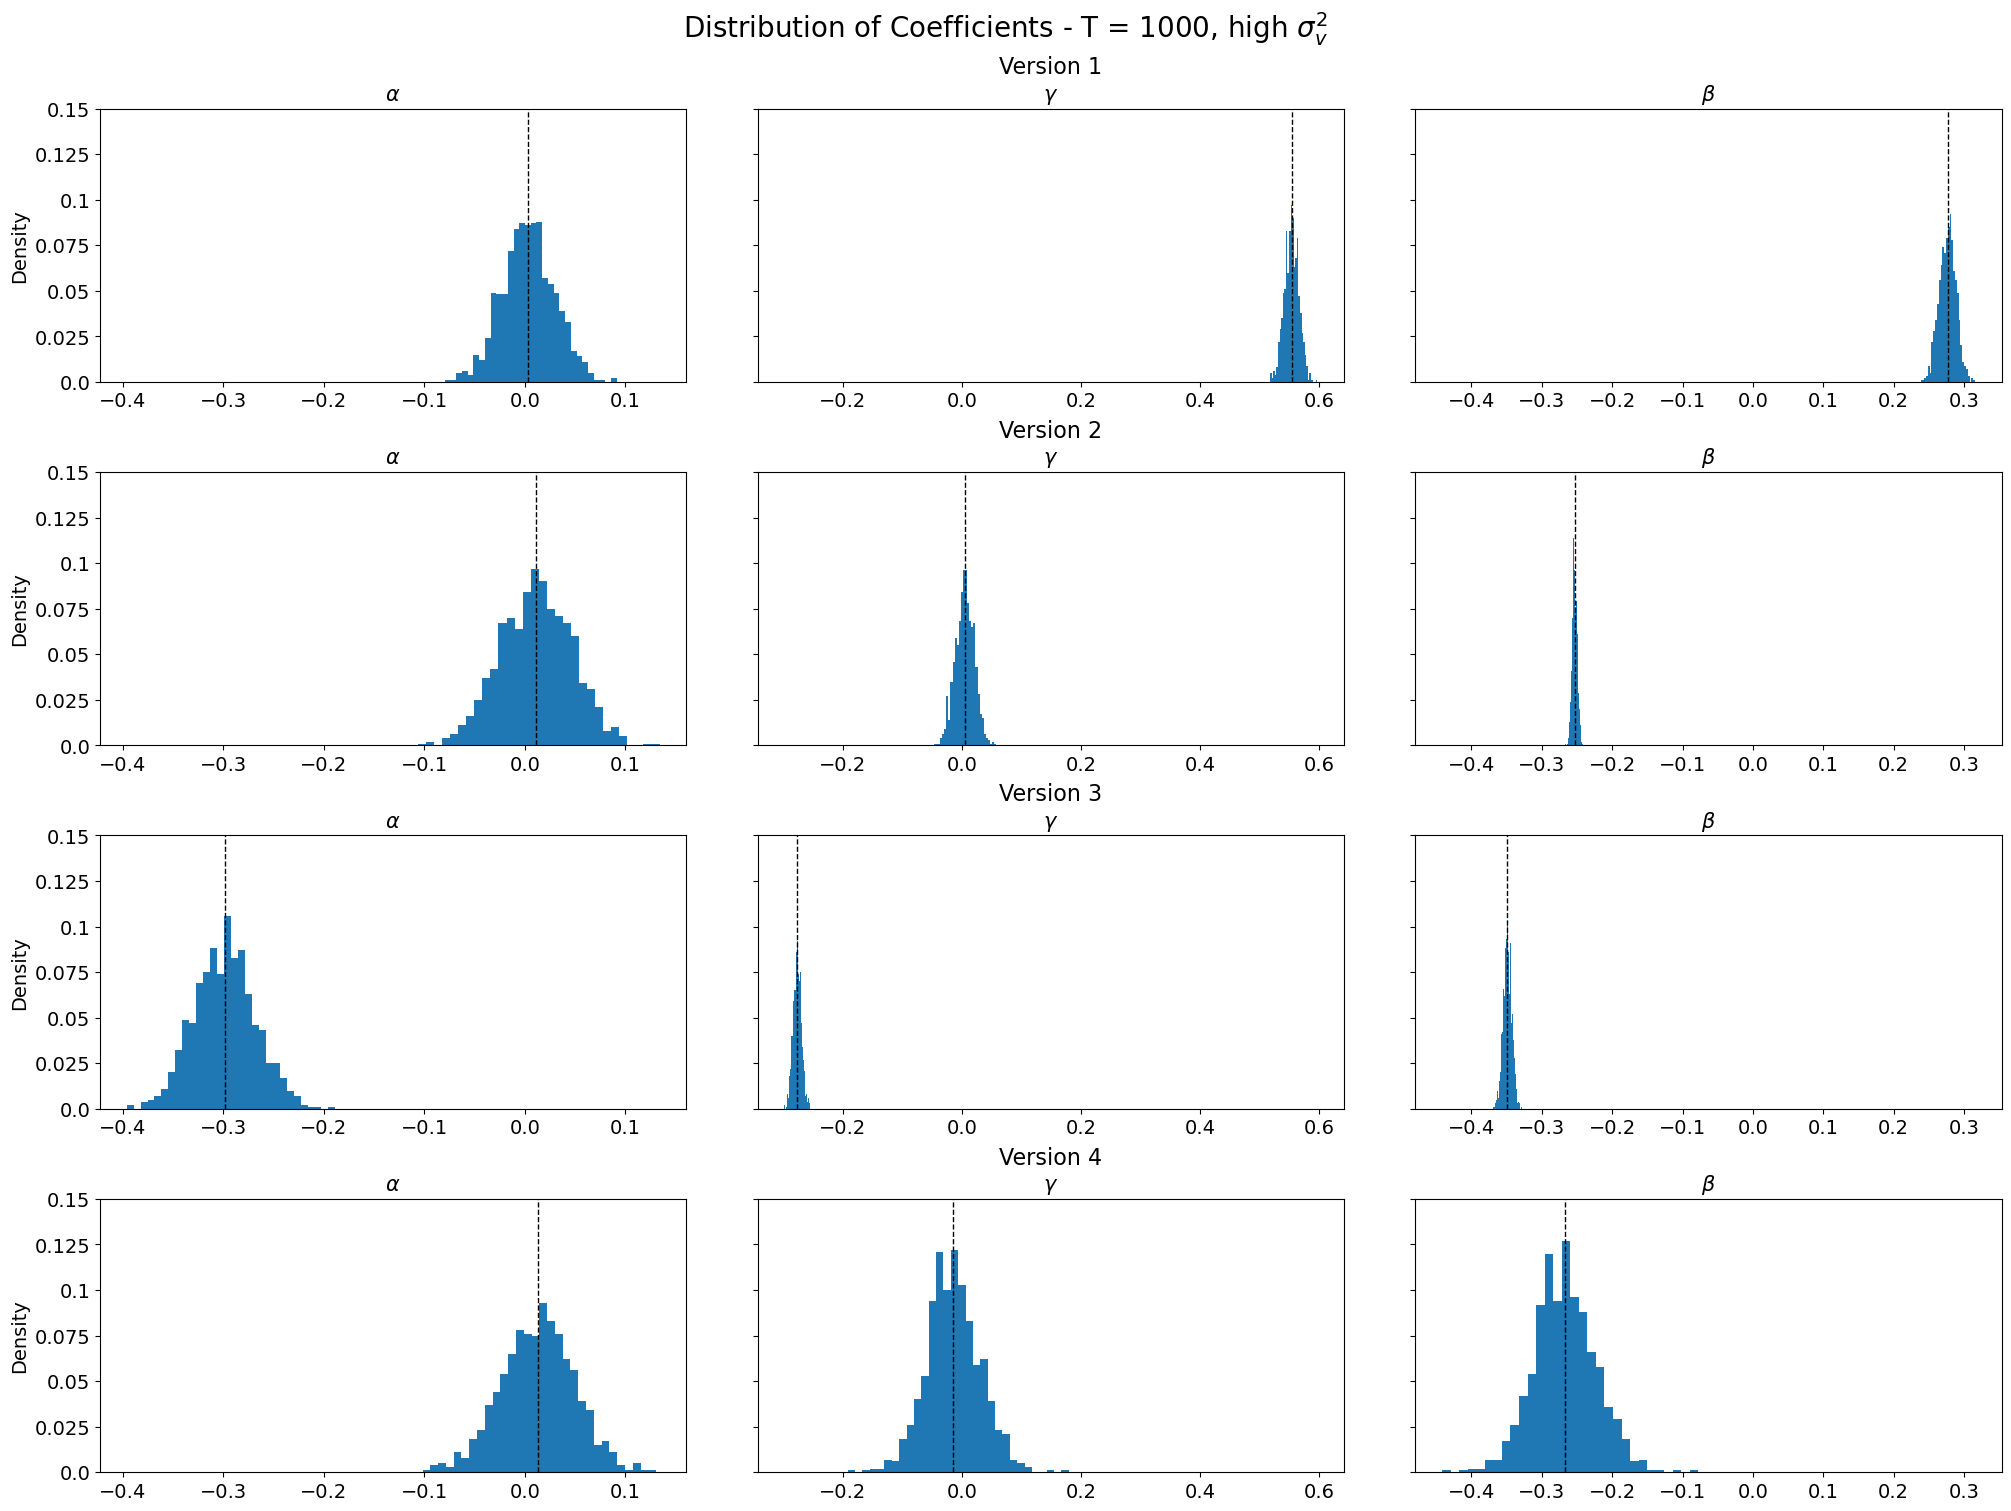

In [12]:
plot_coefs_all("T = 1000, high $\\sigma^2_v$", [t1_high_v_var_coefs_1, t1_high_v_var_coefs_2, t1_high_v_var_coefs_3, t1_high_v_var_coefs_4])

#### T1: High $\omega$ Case

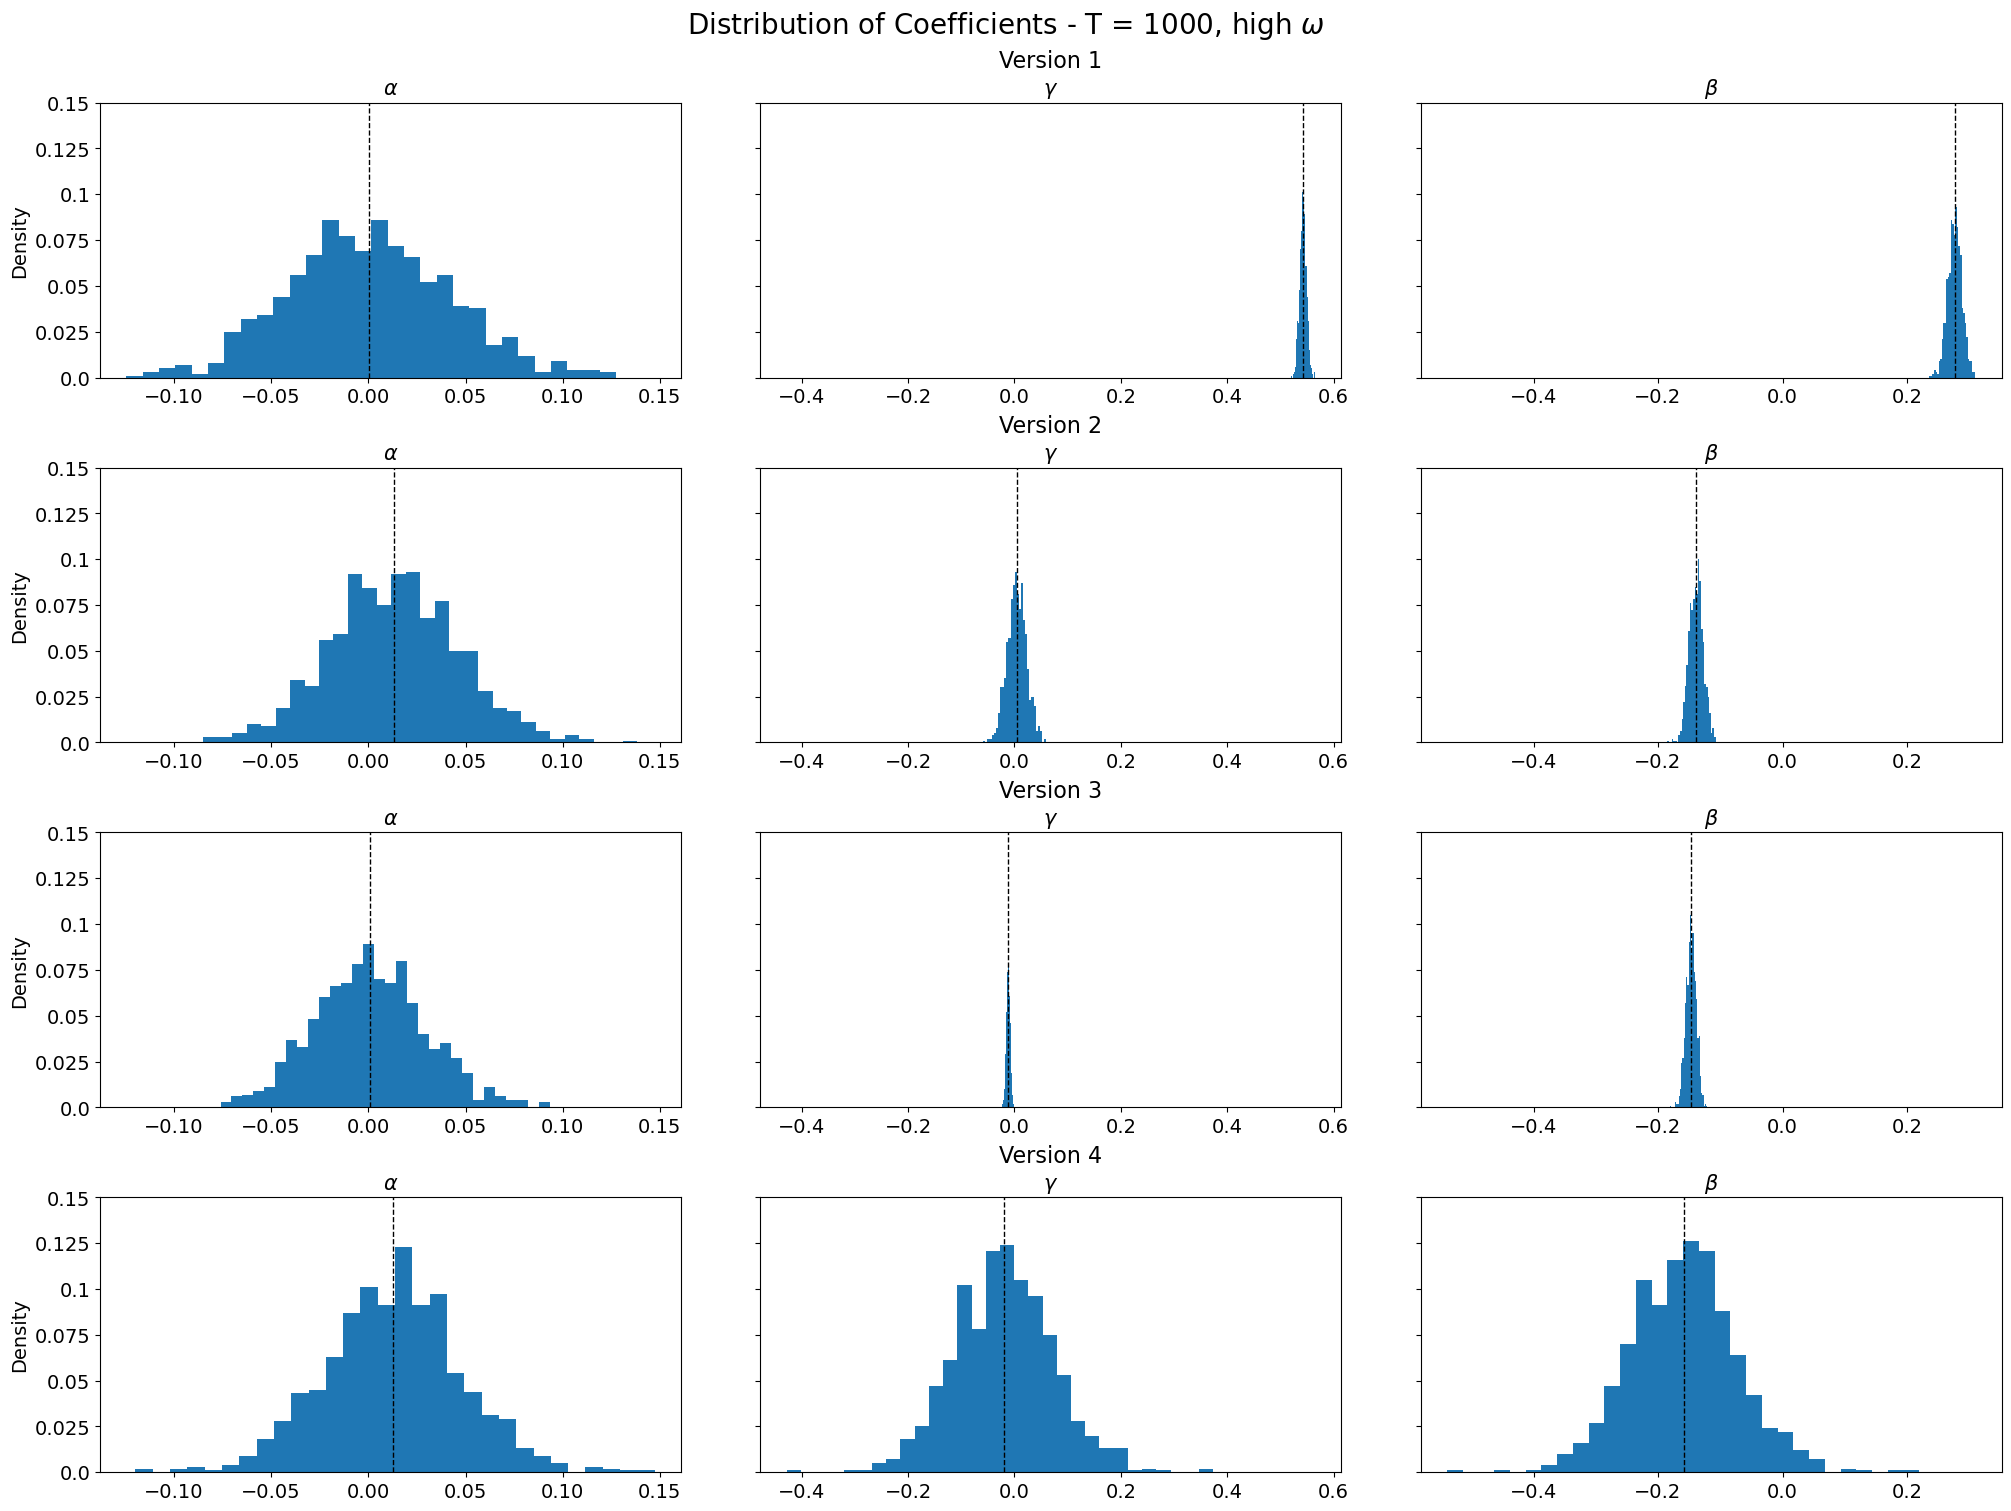

In [13]:
plot_coefs_all("T = 1000, high $\\omega$", [t1_high_w_range_coefs_1, t1_high_w_range_coefs_2, t1_high_w_range_coefs_3, t1_high_w_range_coefs_4])

#### Trial 1: High $\sigma^2_v$ and $\omega$ Case

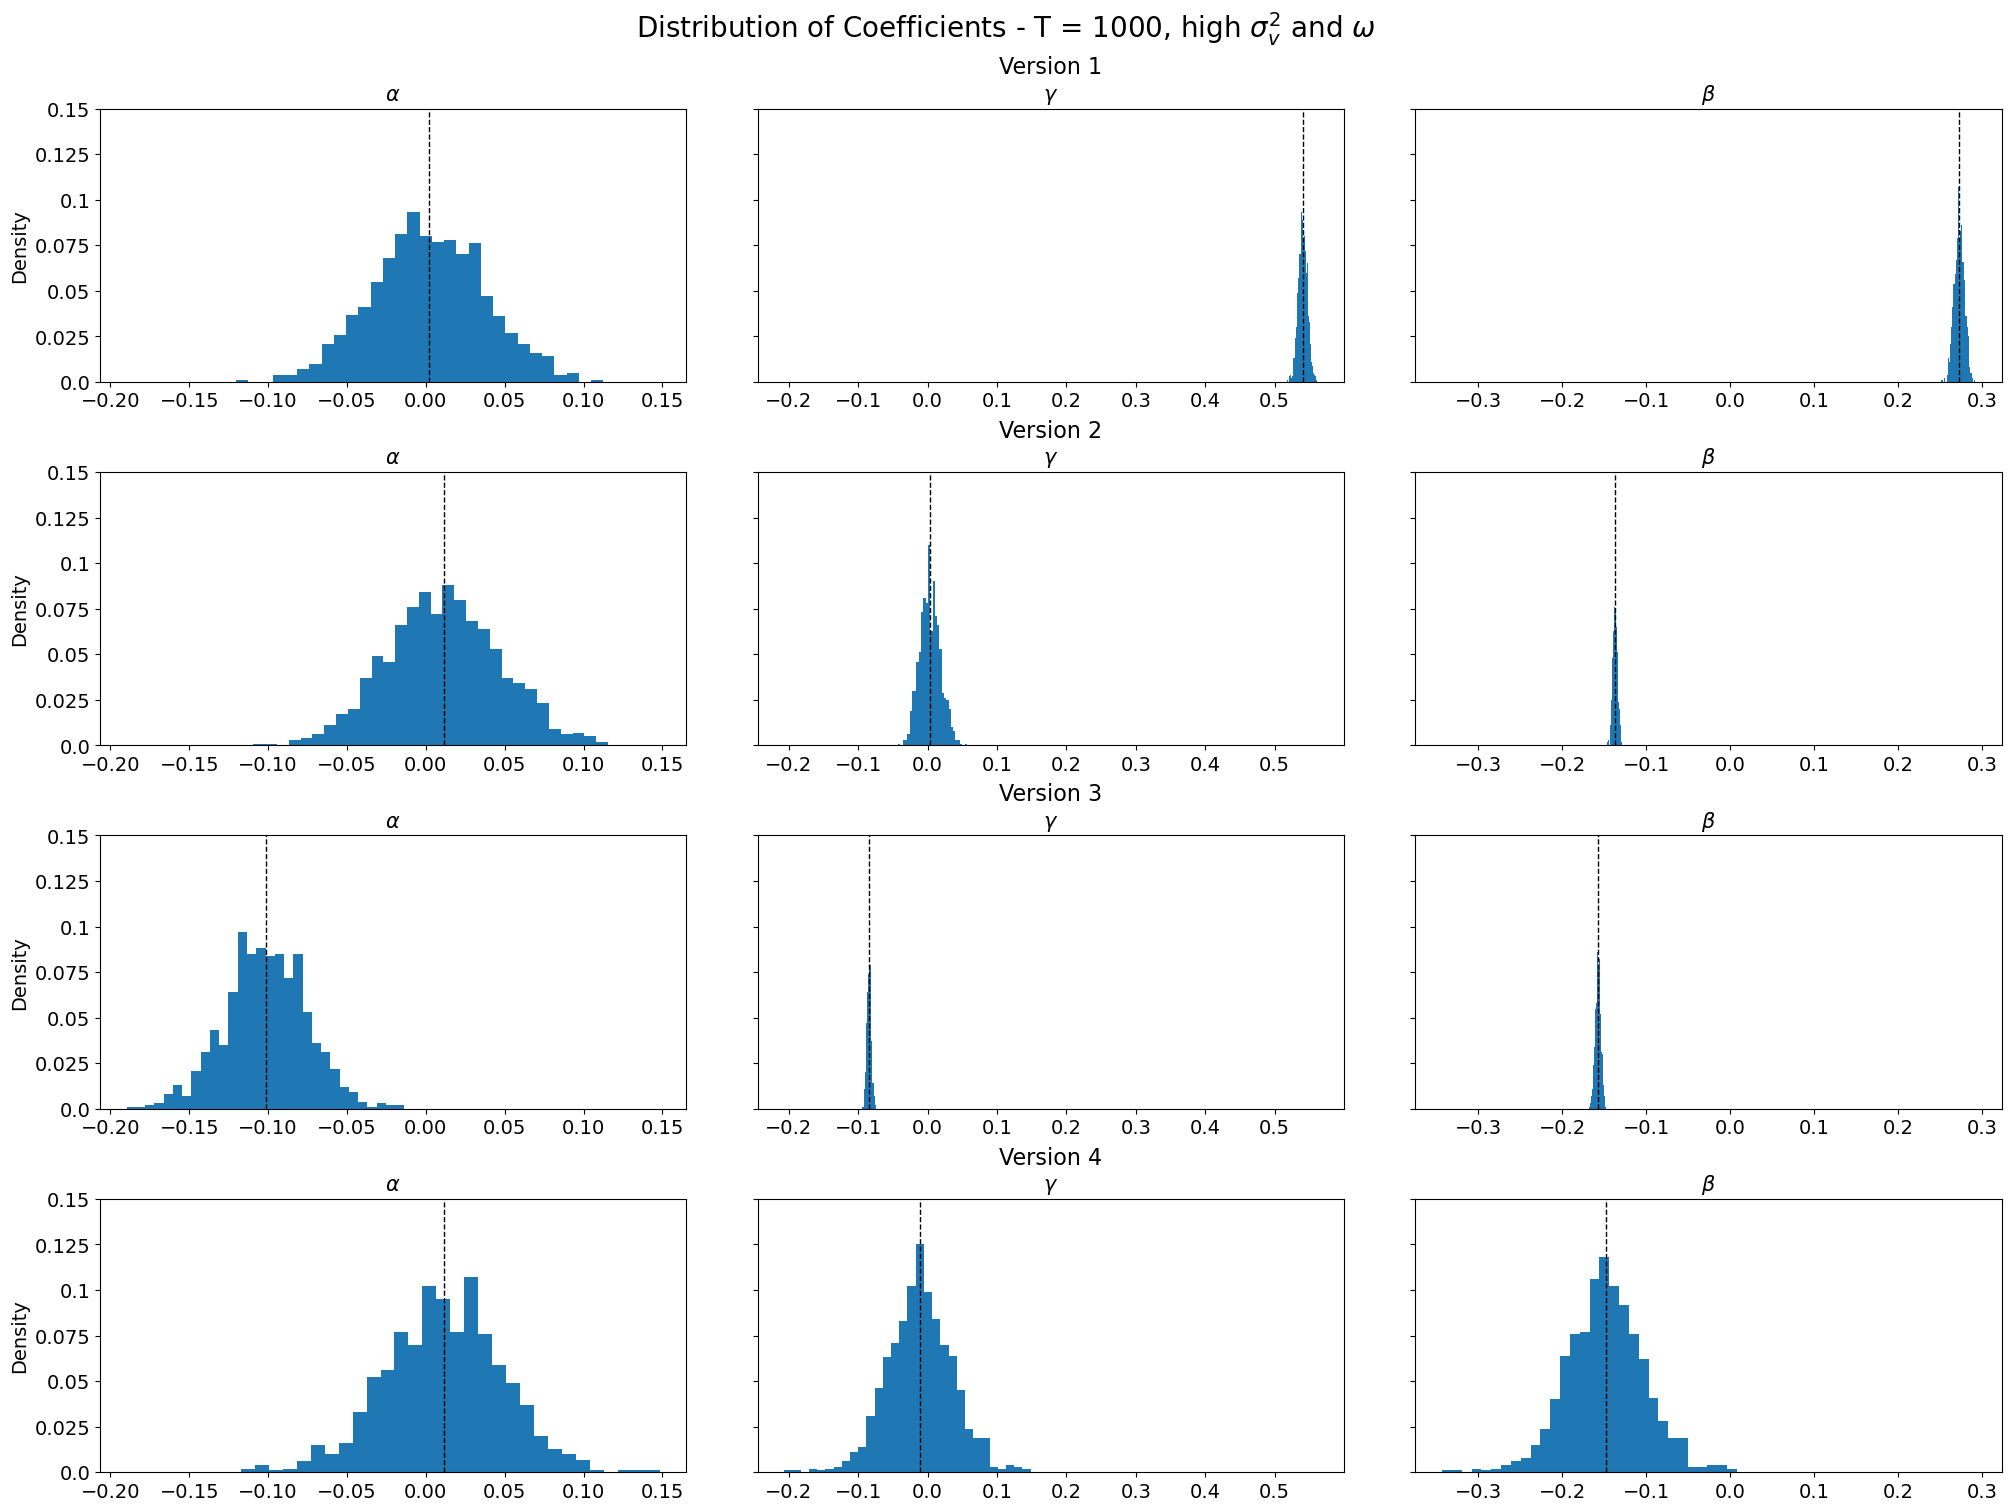

In [14]:
plot_coefs_all("T = 1000, high $\\sigma^2_v$ and $\\omega$", [t1_high_v_and_w_coefs_1, t1_high_v_and_w_coefs_2, t1_high_v_and_w_coefs_3, t1_high_v_and_w_coefs_4])

---
### Trial 2: T = 10000 case

#### T2: Base Case

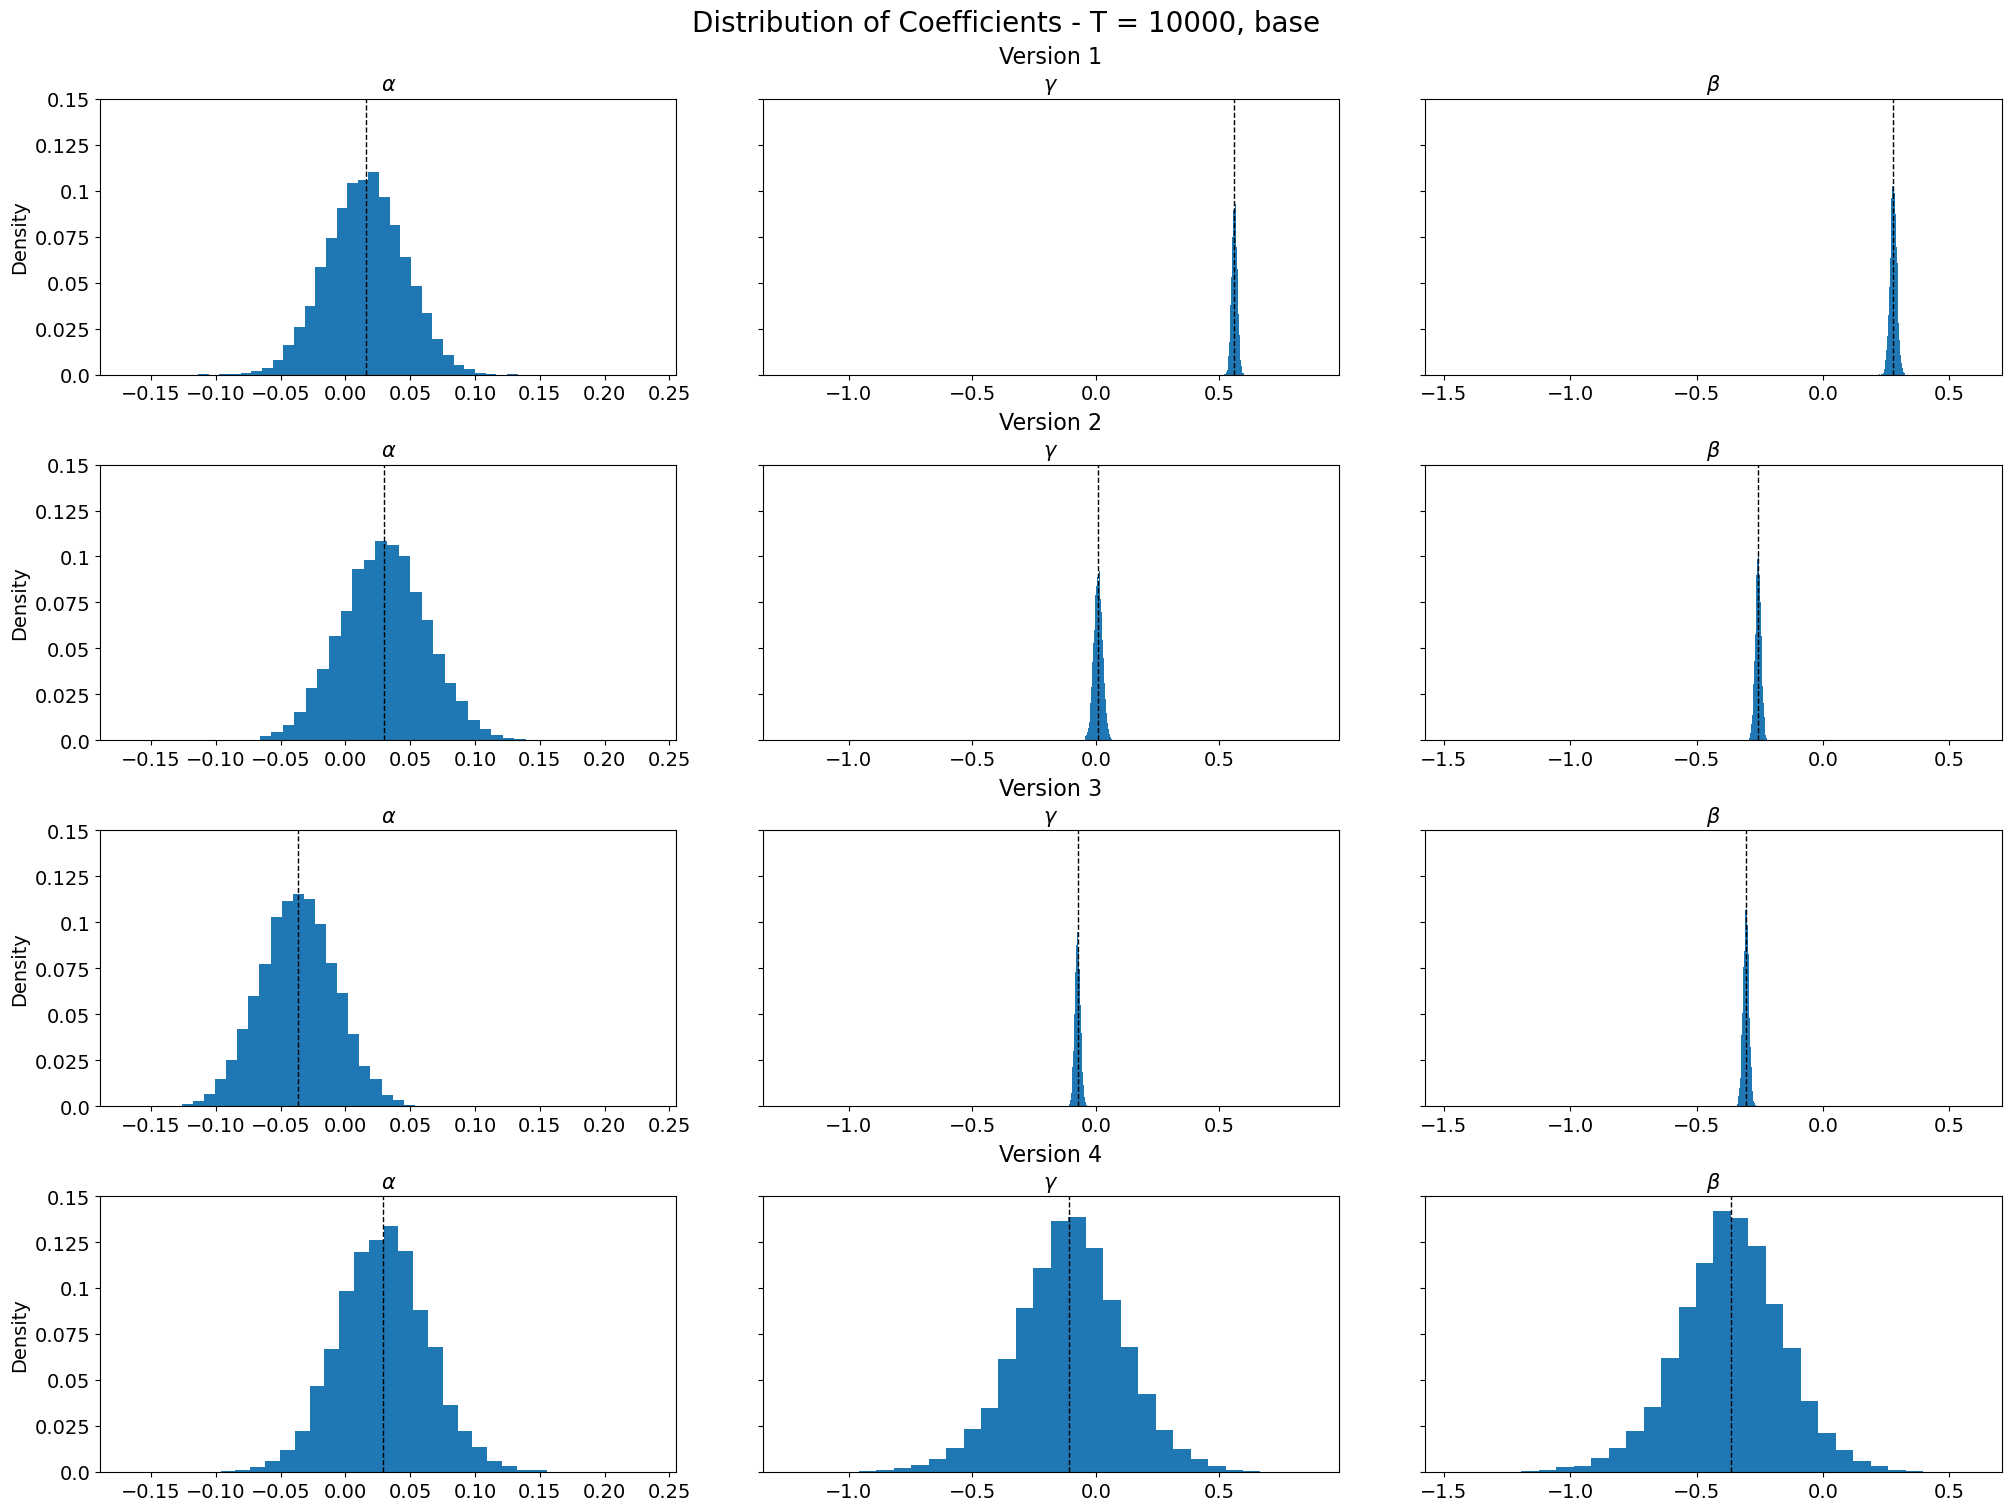

In [15]:
plot_coefs_all("T = 10000, base", [t2_base_coefs_1, t2_base_coefs_2, t2_base_coefs_3, t2_base_coefs_4])

#### Trial 2: High $\sigma^2_v$ Case

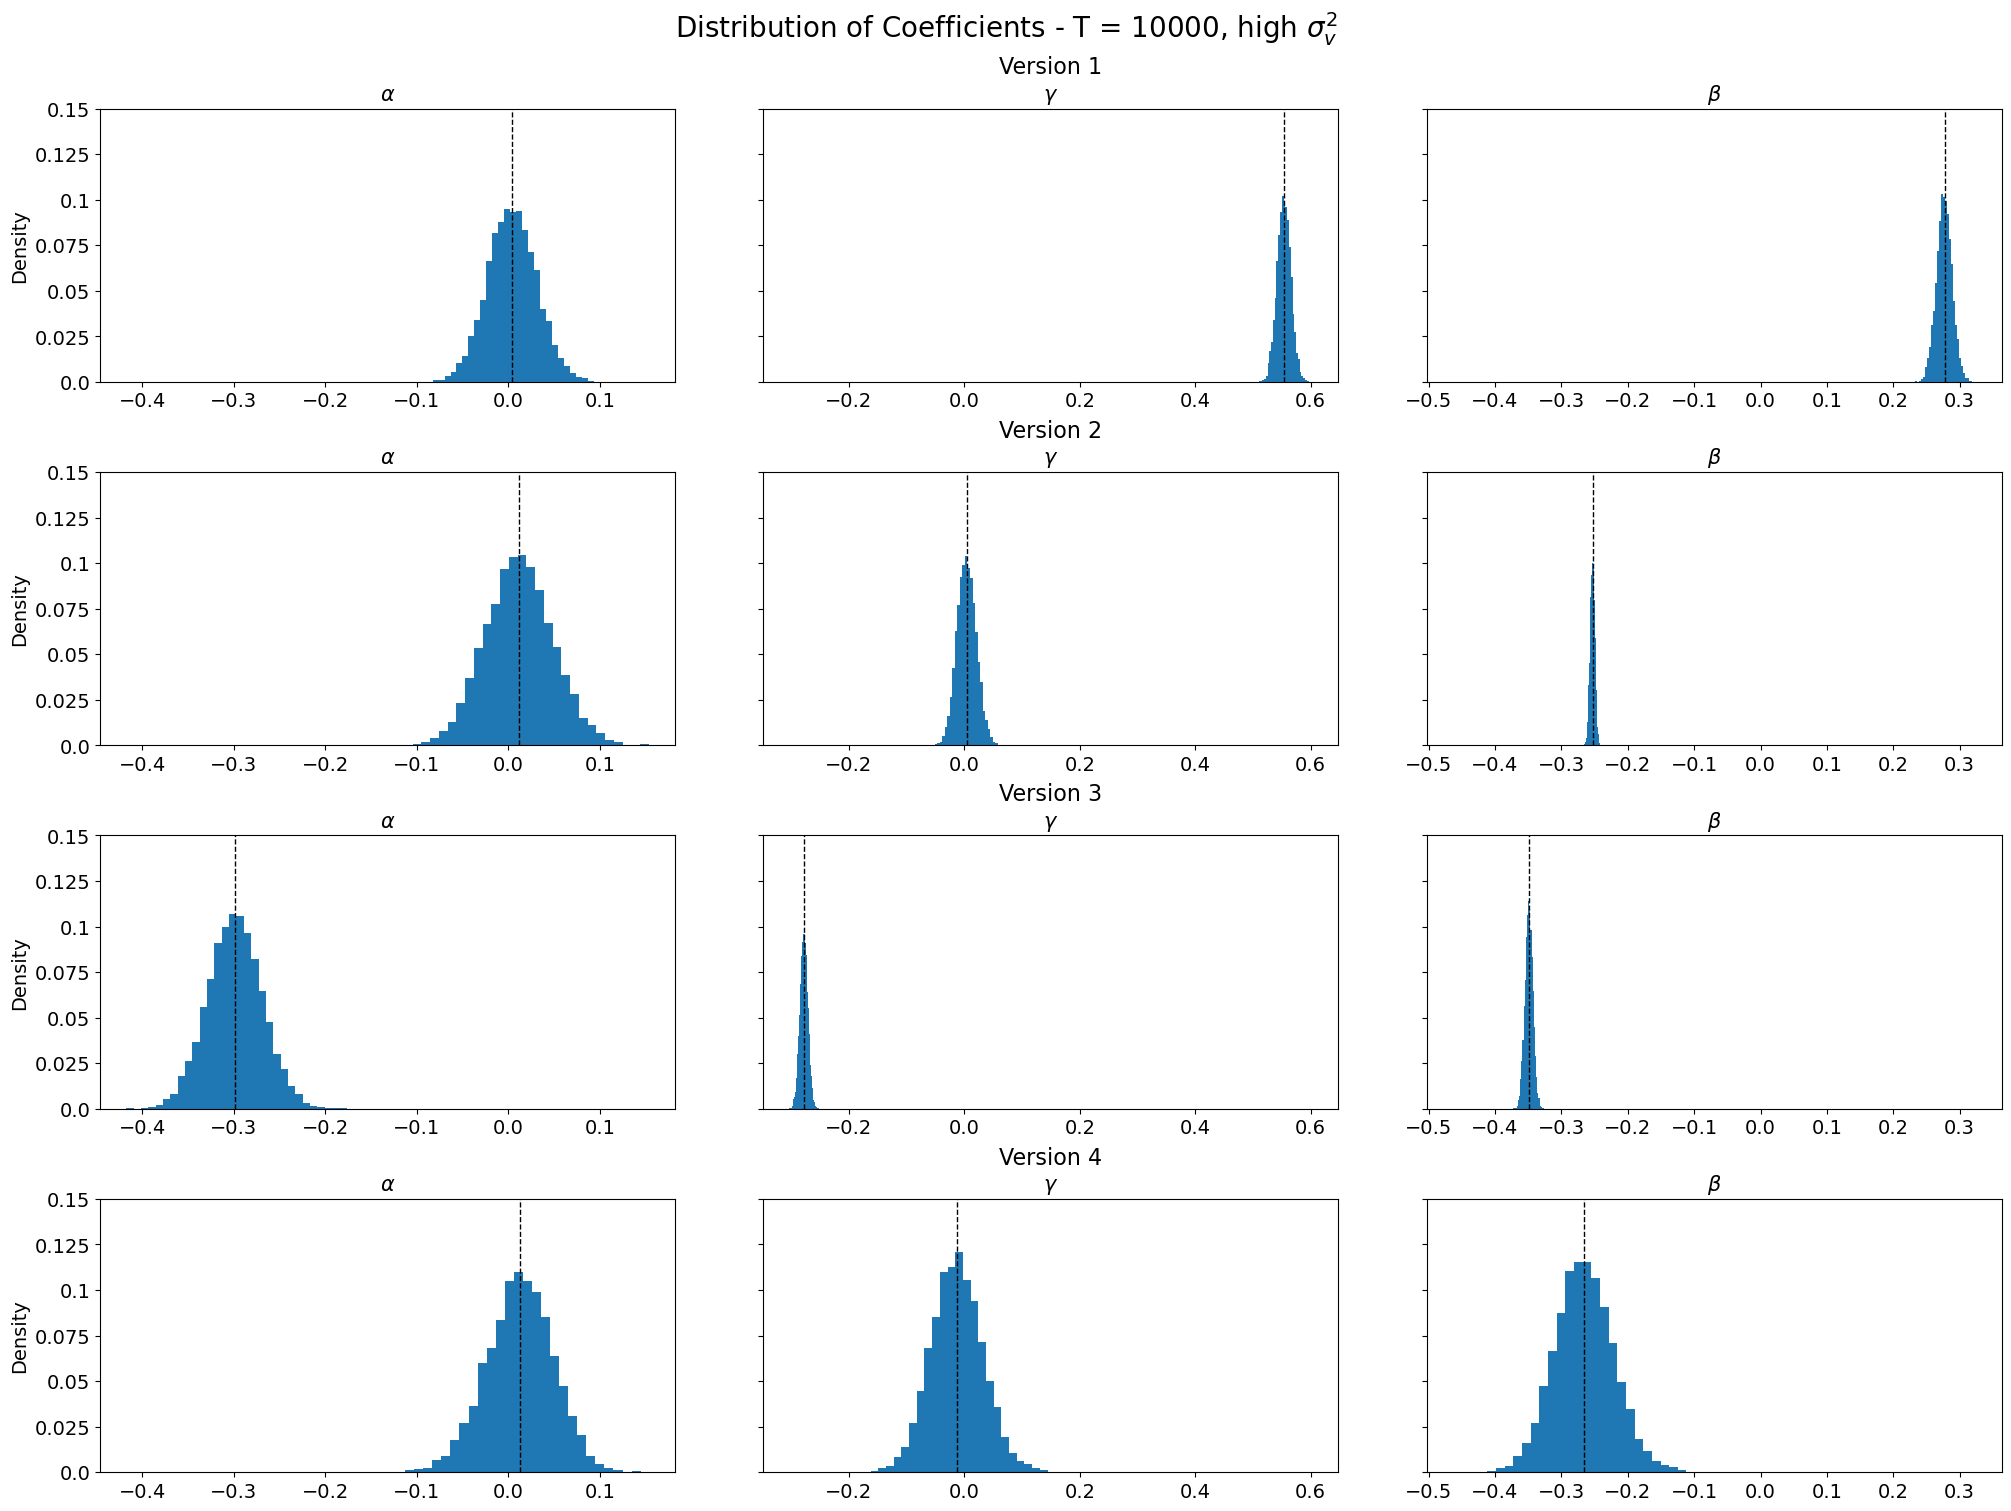

In [16]:
plot_coefs_all("T = 10000, high $\\sigma^2_v$", [t2_high_v_var_coefs_1, t2_high_v_var_coefs_2, t2_high_v_var_coefs_3, t2_high_v_var_coefs_4])

#### T2: High $\omega$ Case

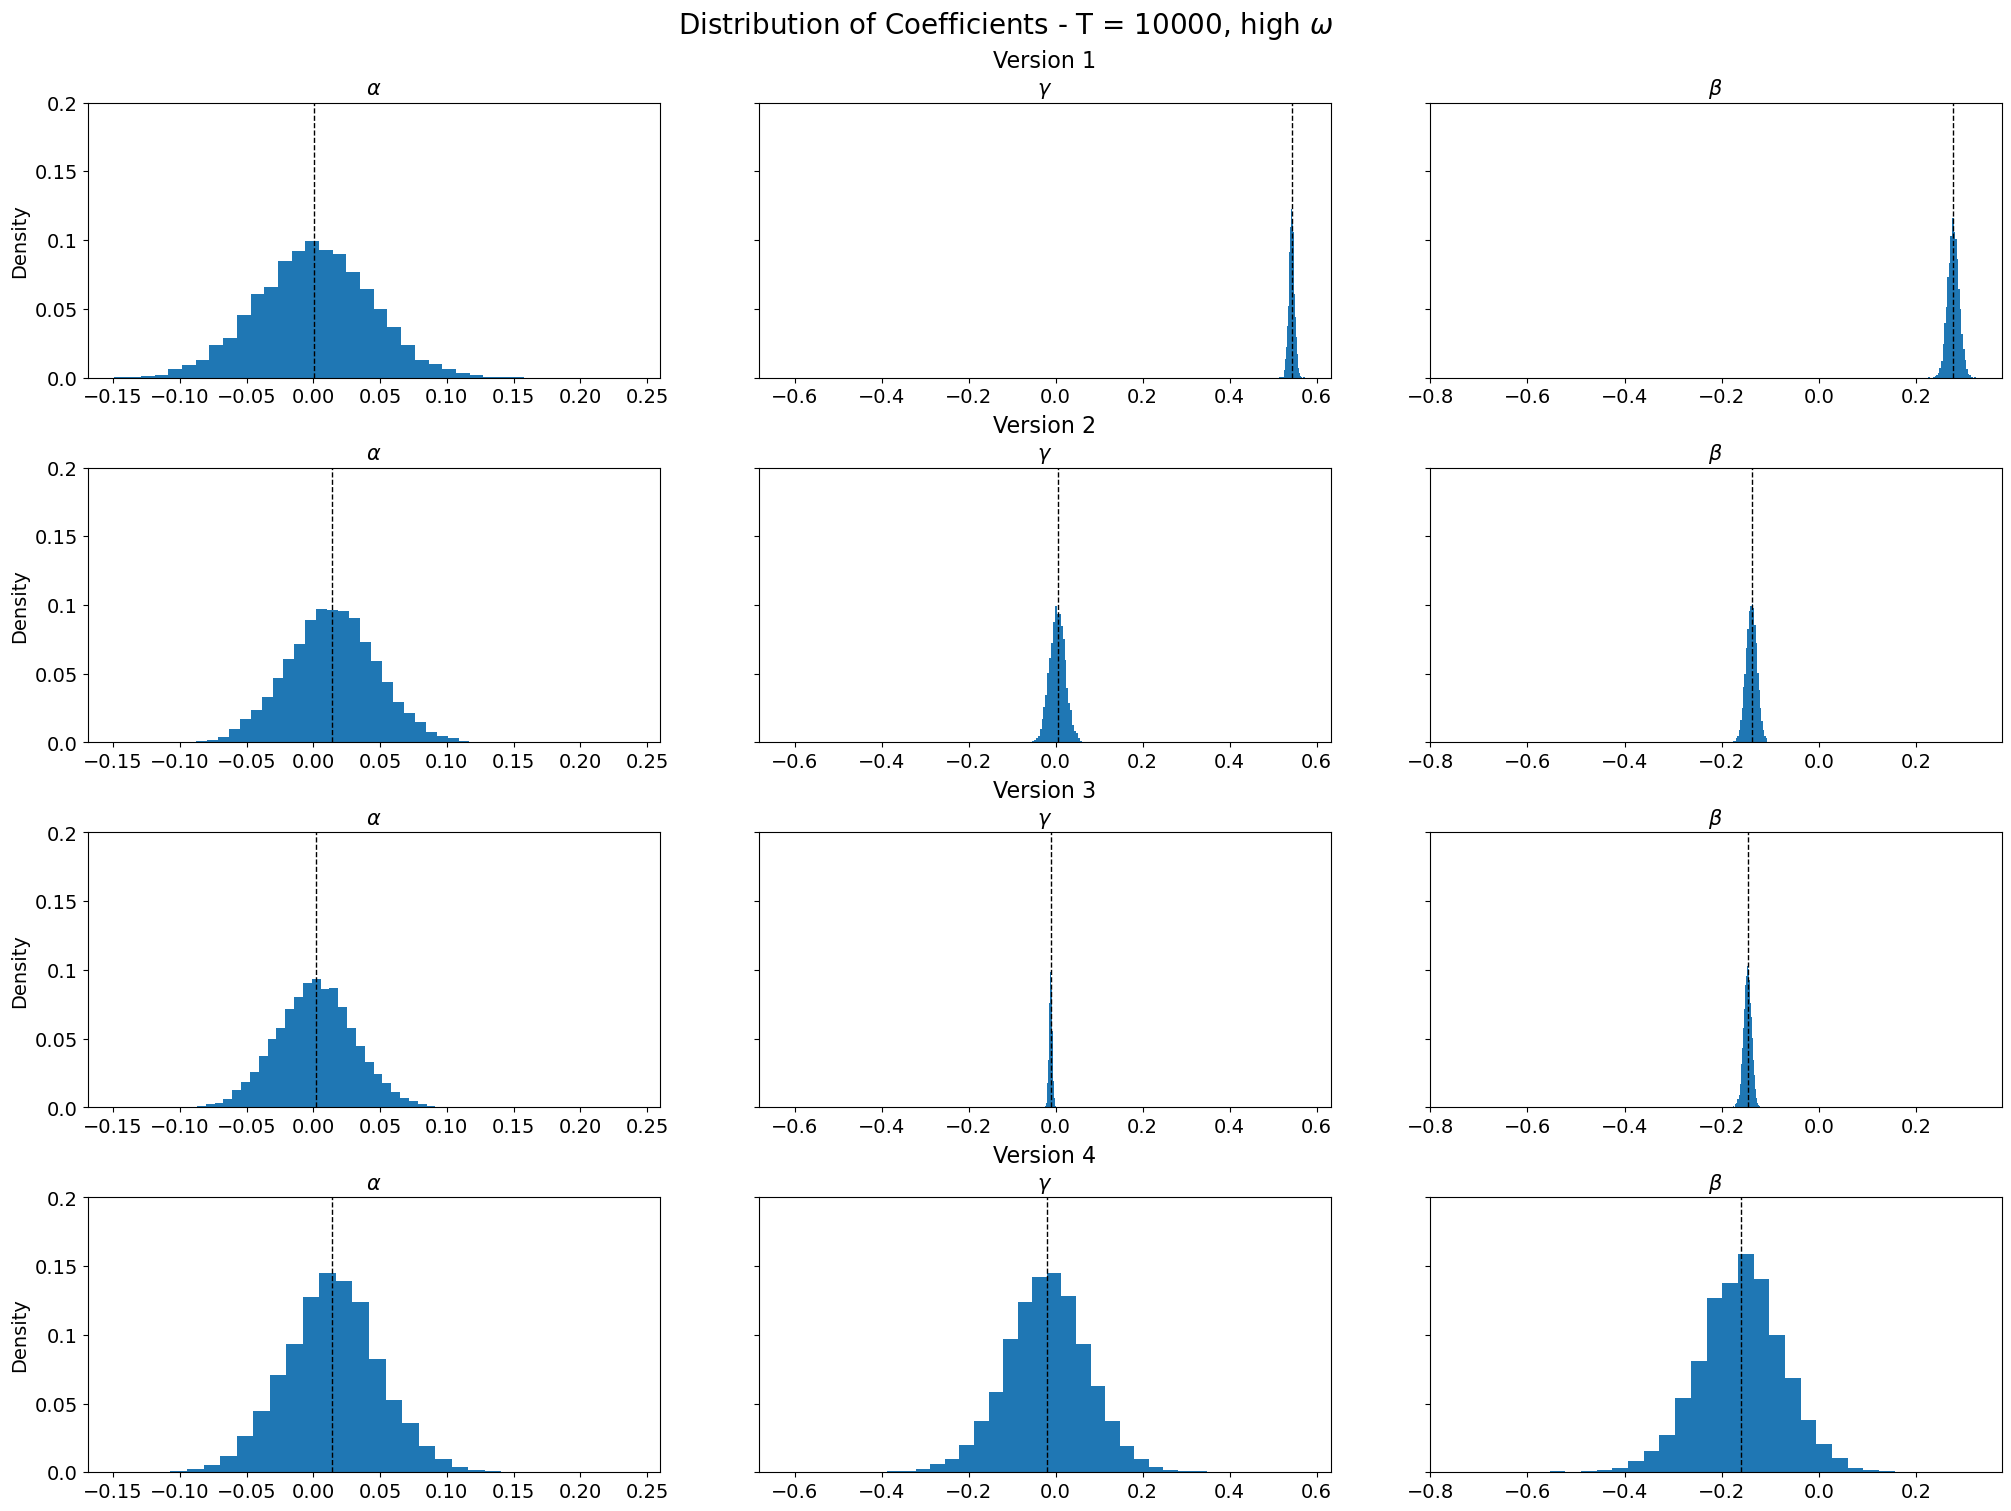

In [17]:
plot_coefs_all("T = 10000, high $\\omega$", [t2_high_w_range_coefs_1, t2_high_w_range_coefs_2, t2_high_w_range_coefs_3, t2_high_w_range_coefs_4])

#### Trial 2: High $\sigma^2_v$ and $\omega$ Case

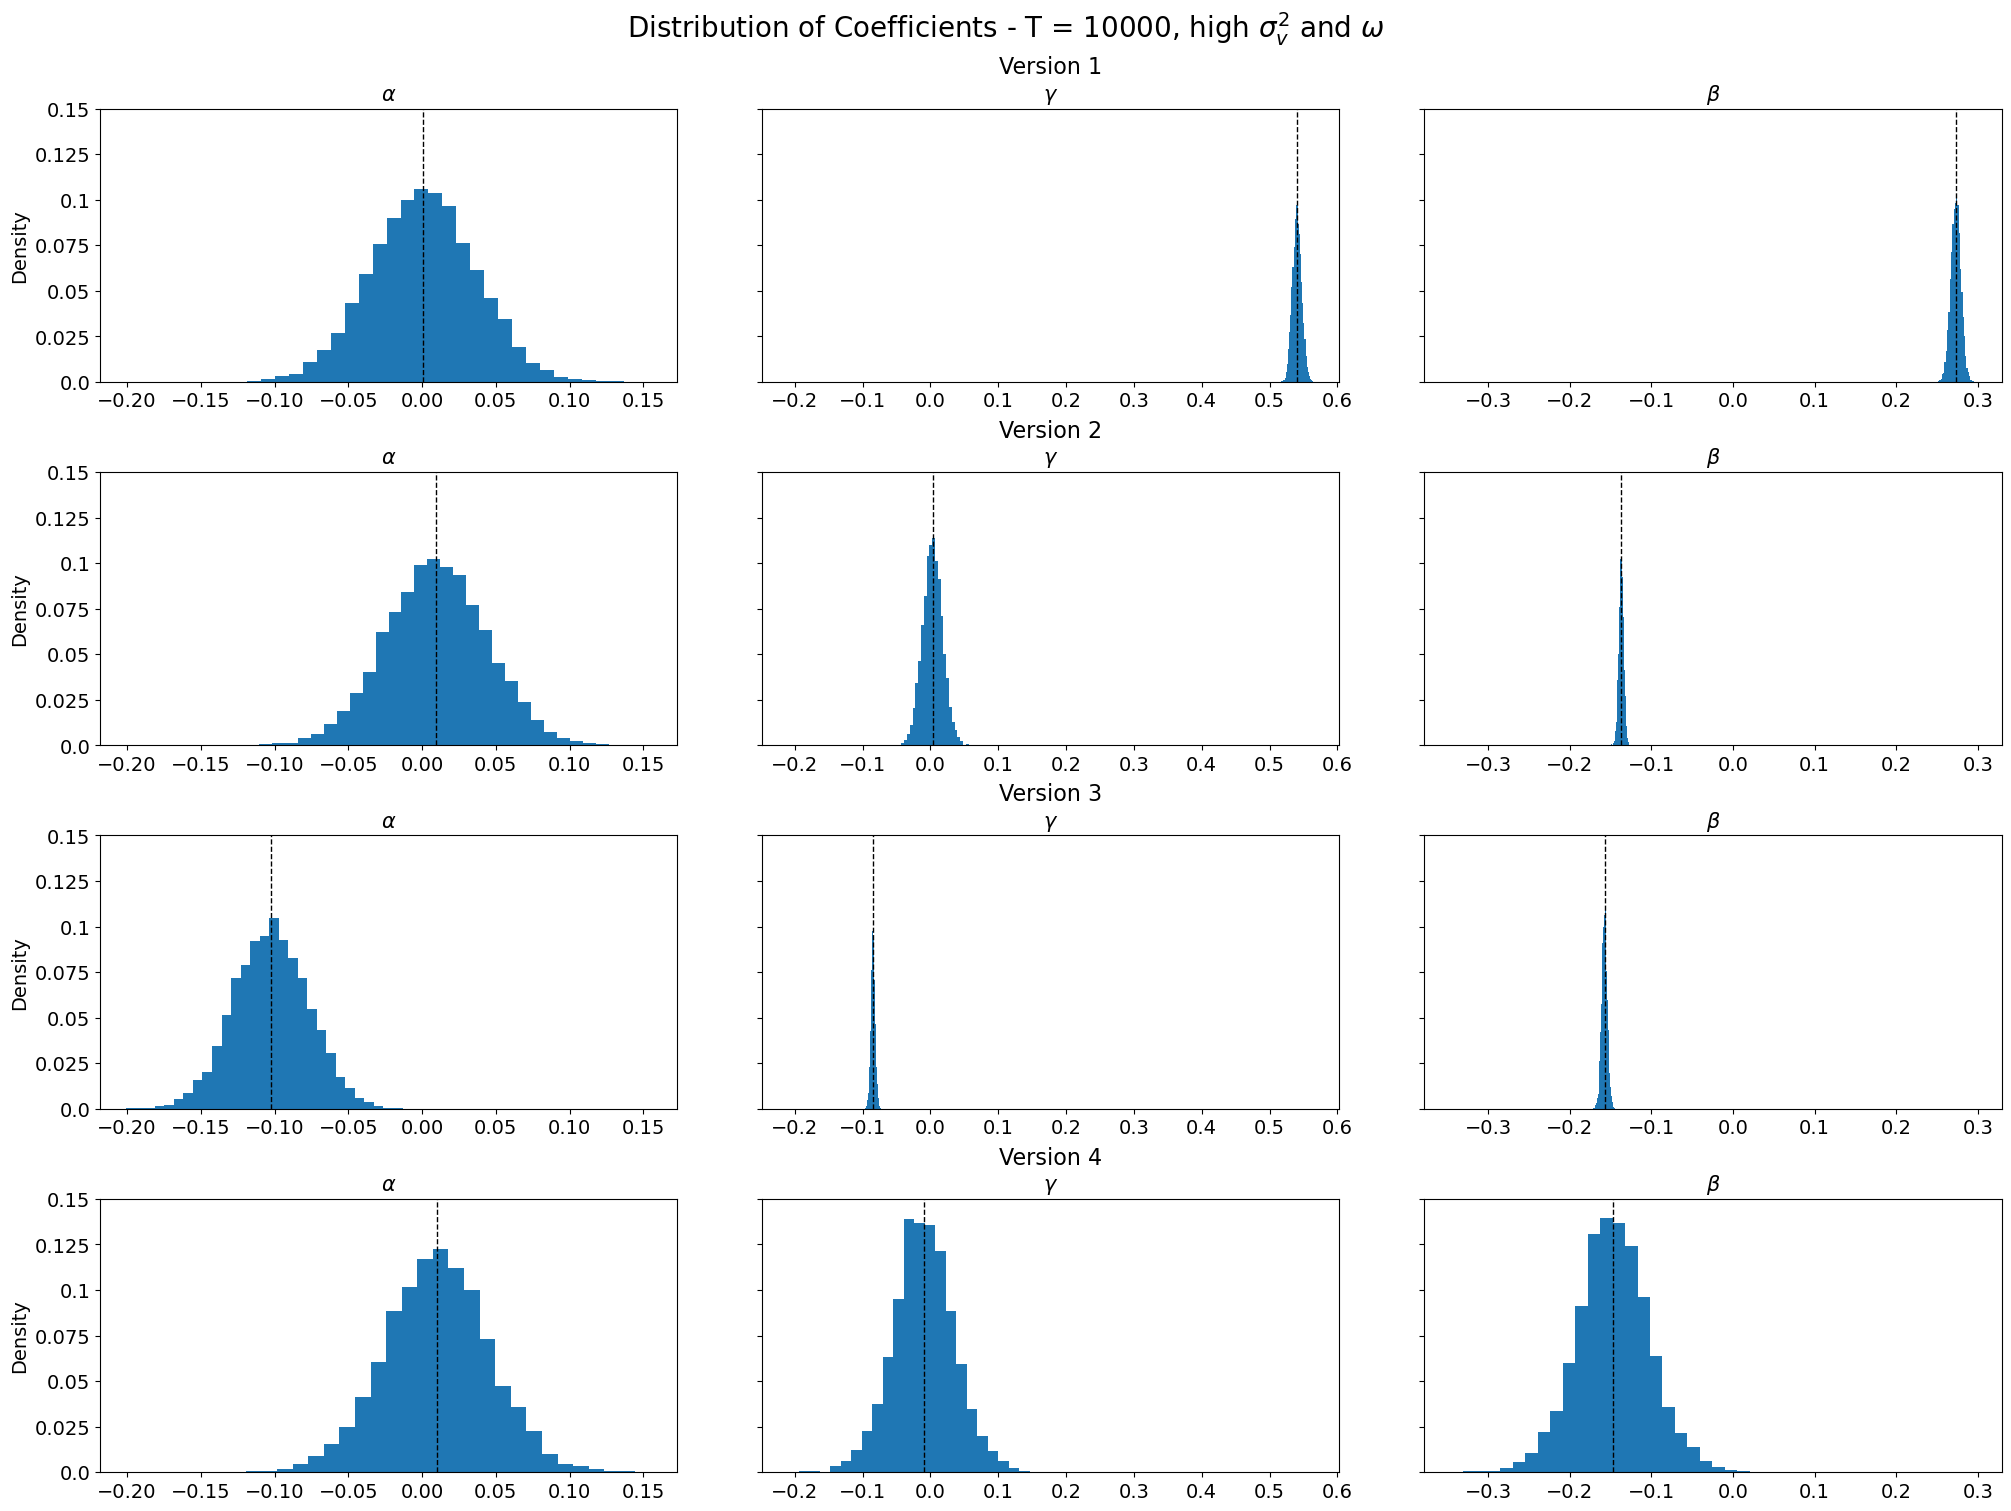

In [18]:
plot_coefs_all("T = 10000, high $\\sigma^2_v$ and $\\omega$", [t2_high_v_and_w_coefs_1, t2_high_v_and_w_coefs_2, t2_high_v_and_w_coefs_3, t2_high_v_and_w_coefs_4])